# Importing Library

In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt

# To supress warnings
import warnings
warnings.filterwarnings('ignore')


# Data Prep

In [2]:
# Reading Data
df = pd.read_csv("datasets/Bitcoin Price.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015/01/01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550.0
1,2015/01/02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650.0
2,2015/01/03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400.0
3,2015/01/04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100.0
4,2015/01/05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800.0


In [3]:
# Dropping Columns
df = df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'],axis=1)

In [4]:
# Converting the Date columns to datetimetype
df['Date'] = pd.to_datetime(df.Date)

In [5]:
# Setting the data columns as index
df.set_index("Date",inplace=True)
df.head(5)

,Close
Date,
2015-01-01,314.248993
2015-01-02,315.032013
2015-01-03,281.082001
2015-01-04,264.195007
2015-01-05,274.473999


# Creating a AD Fuller function to test for Stationarity

In [14]:
# Module Required
from statsmodels.tsa.stattools import adfuller

# ADF test
# adf_result = adfuller(df, autolag='AIC')

def adfuller_result(df, autolag="AIC"):
    adf_result = adfuller(df, autolag='AIC')
    print("ADF Statistic: {}".format(adf_result[0]))
    print("P-Value: {}".format(adf_result[1]))
    print("Critical Value:")
    for key, value in adf_result[4].items():
        print("\t",key,":",value)
        
    if adf_result[0] < adf_result[4]["5%"]:
        print ("Reject Ho - Time Series is Stationary")
    else:
        print ("Failed to Reject Ho - Time Series is Non-Stationary")

    


In [6]:
# Setting Default Parameters for plotting
plt.rcParams['figure.figsize'] = (30, 10)
font = {'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

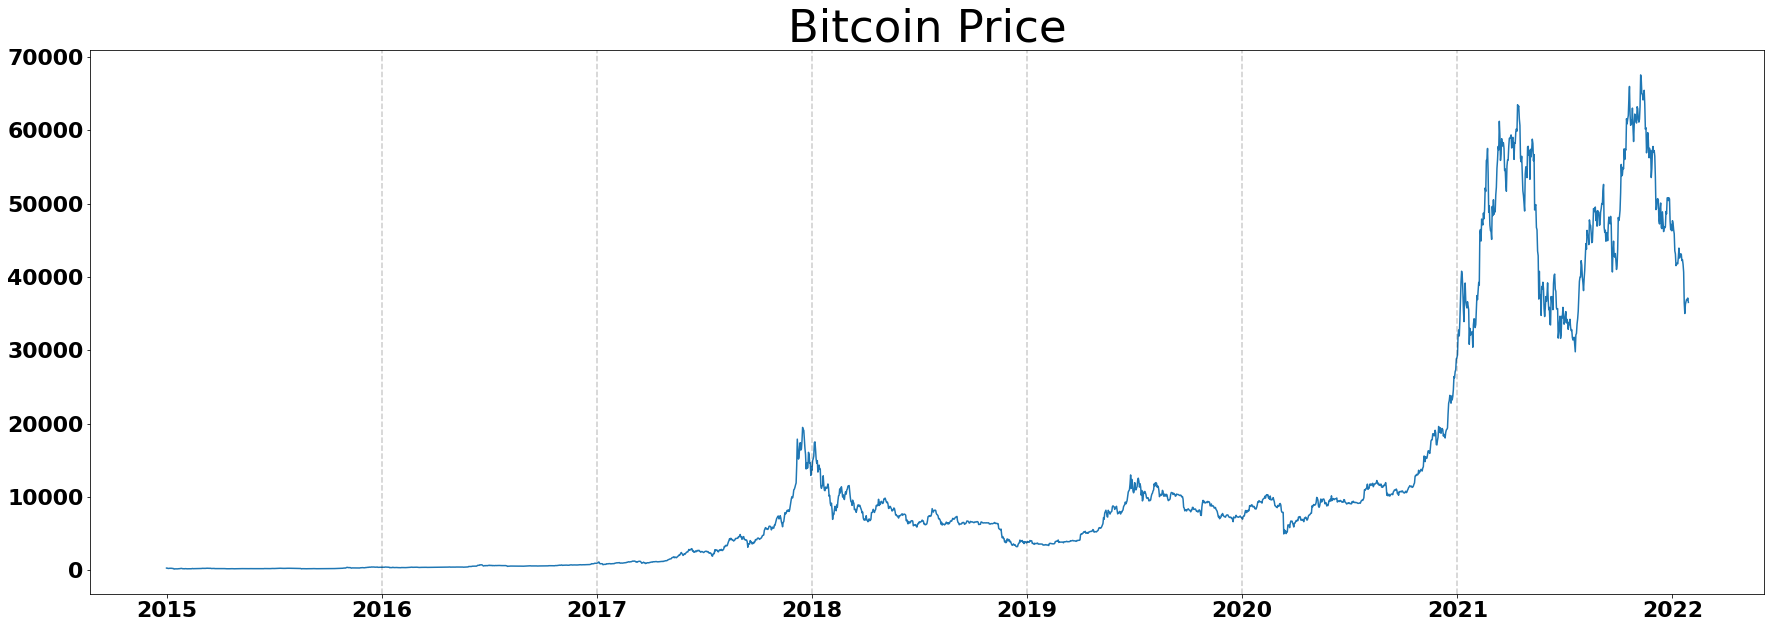

In [9]:
# Plotting the Orignal Data
plt.plot(df["Close"],label="Data")
plt.title("Bitcoin Price", size=45)
for year in range(int(str(df.index[1])[:4])+1,2022):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"),color="k",linestyle="--",alpha=0.2)
plt.show()

### Testing Stationarity of Orignal TS

In [15]:
adfuller_result(df.Close)

ADF Statistic: -1.4119729160696586
P-Value: 0.5765228830274571
Critical Value:
	 1% : -3.4329109857007527
	 5% : -2.862671440775931
	 10% : -2.5673723078962385
Failed to Reject Ho - Time Series is Non-Stationary


# Ways to Make Time Series Stationary

## Differencing

In [12]:
# Making a copy of the DataFrame
df1 = df.copy()

In [27]:
# making a differenced series 
df1["Differencing"] = df1.diff()
df1.head()

,Close,Differencing
Date,,
2015-01-01,314.248993,NaN
2015-01-02,315.032013,0.783020
2015-01-03,281.082001,-33.950012
2015-01-04,264.195007,-16.886993
2015-01-05,274.473999,10.278992


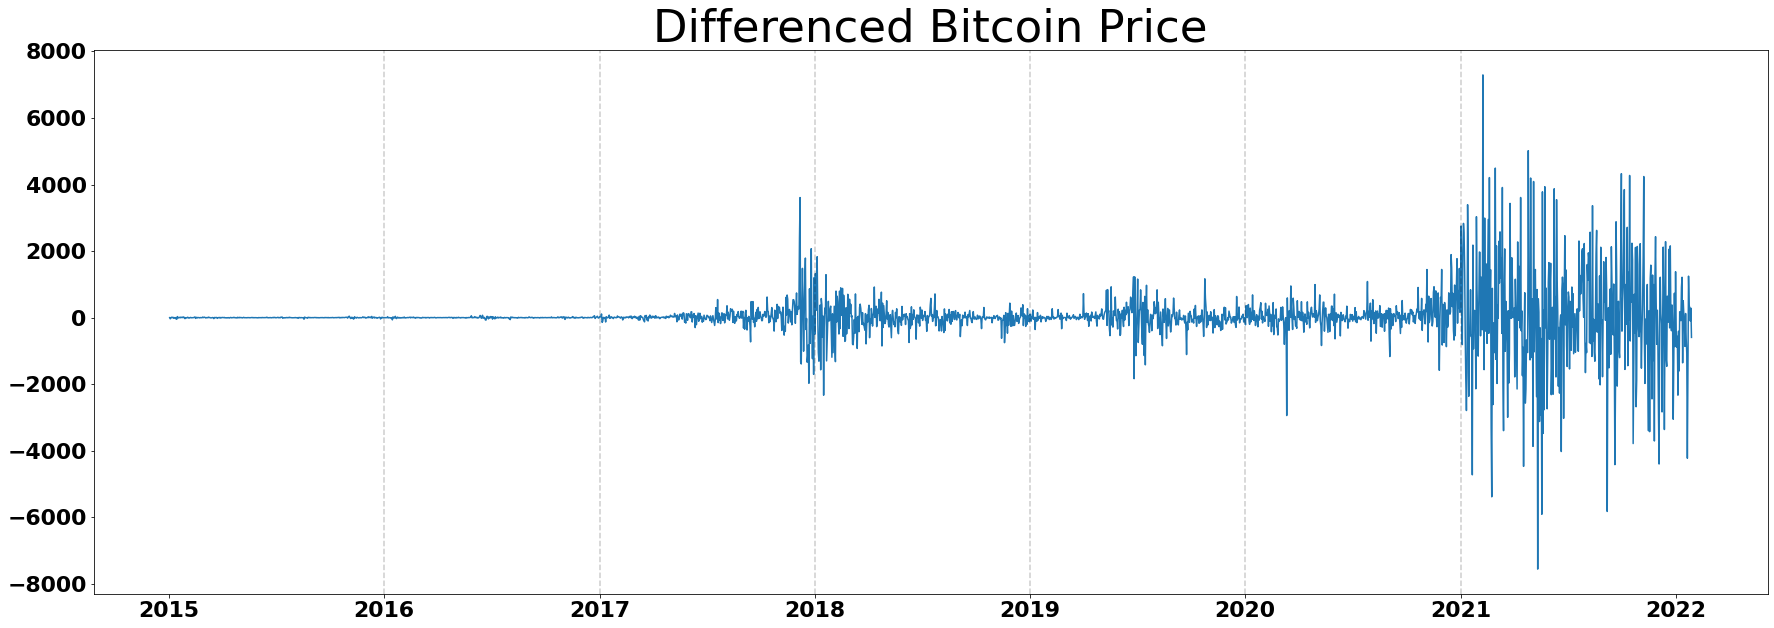

In [20]:
# Plotting the Differenced series
plt.plot(df1["Differencing"],label="Data")
plt.title("Differenced Bitcoin Price", size=45)
for year in range(int(str(df.index[1])[:4])+1,2022):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"),color="k",linestyle="--",alpha=0.2)
plt.show()

In [25]:
# Testing Stationarity of Differenced Timeseries
adfuller_result(df1["Differencing"].dropna())

ADF Statistic: -8.106316801132454
P-Value: 1.2600769700500245e-12
Critical Value:
	 1% : -3.432911989053234
	 5% : -2.8626718838655236
	 10% : -2.5673725438015325
Reject Ho - Time Series is Stationary


## Rolling mean

In [30]:
# making a copy of the DataFrame
df2 = df.copy()

In [33]:
# Creating a rolling mean series 
df2['Rolling mean']= df.rolling(window = 7).mean() # taking rolling window 7, because bitcoin is traded 7 days a week
df2.head(10)


,Close,Rolling mean
Date,,
2015-01-01,314.248993,NaN
2015-01-02,315.032013,NaN
2015-01-03,281.082001,NaN
2015-01-04,264.195007,NaN
2015-01-05,274.473999,NaN
2015-01-06,286.188995,NaN
2015-01-07,294.337006,289.936859
2015-01-08,283.348999,285.522574
2015-01-09,290.407989,282.004857


In [40]:
# Subtracting rolling mean from orignal series
df2["Differenced_mean"] = df2["Close"] - df2["Rolling mean"]
df2.head(10)

,Close,Rolling mean,Differened_mean,Differenced_mean
Date,,,,
2015-01-01,314.248993,NaN,NaN,NaN
2015-01-02,315.032013,NaN,NaN,NaN
2015-01-03,281.082001,NaN,NaN,NaN
2015-01-04,264.195007,NaN,NaN,NaN
2015-01-05,274.473999,NaN,NaN,NaN
2015-01-06,286.188995,NaN,NaN,NaN
2015-01-07,294.337006,289.936859,4.400146,4.400146
2015-01-08,283.348999,285.522574,-2.173575,-2.173575
2015-01-09,290.407989,282.004857,8.403133,8.403133


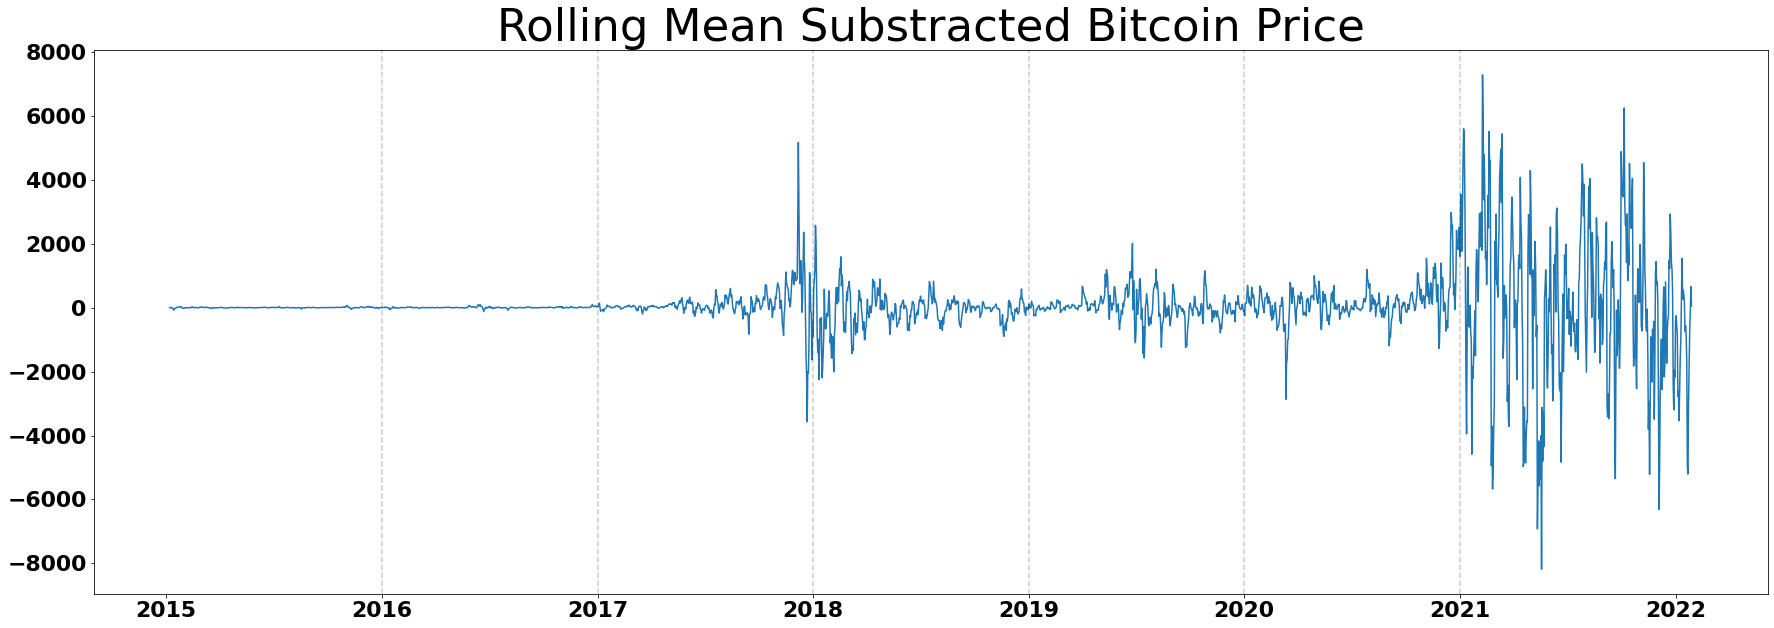

In [63]:
# Plotting differenced rolling mean series
plt.plot(df2["Differenced_mean"],label="Data")
plt.title("Rolling Mean Substracted Bitcoin Price", size=45)
for year in range(int(str(df.index[1])[:4])+1,2022):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"),color="k",linestyle="--",alpha=0.2)
plt.show()

In [44]:
# Testing for Stationarity
adfuller_result(df2["Differenced_mean"].dropna())

ADF Statistic: -7.852387930626955
P-Value: 5.556567307763832e-12
Critical Value:
	 1% : -3.43291701763171
	 5% : -2.862674104529329
	 10% : -2.567373726105344
Reject Ho - Time Series is Stationary


## Log Transformation

In [64]:
# Making a copy of the DataFrame
df3 = df.copy()

In [65]:
# Creating a log transformation
df3["log"] = np.log(df3.Close,)
df3.head()

,Close,log
Date,,
2015-01-01,314.248993,5.750186
2015-01-02,315.032013,5.752674
2015-01-03,281.082001,5.638646
2015-01-04,264.195007,5.576687
2015-01-05,274.473999,5.614857


In [66]:
# Taking a difference of logged transformation
df3["log difference"] = df3["log"].diff()
df3.head()

,Close,log,log difference
Date,,,
2015-01-01,314.248993,5.750186,NaN
2015-01-02,315.032013,5.752674,0.002489
2015-01-03,281.082001,5.638646,-0.114028
2015-01-04,264.195007,5.576687,-0.061959
2015-01-05,274.473999,5.614857,0.038169


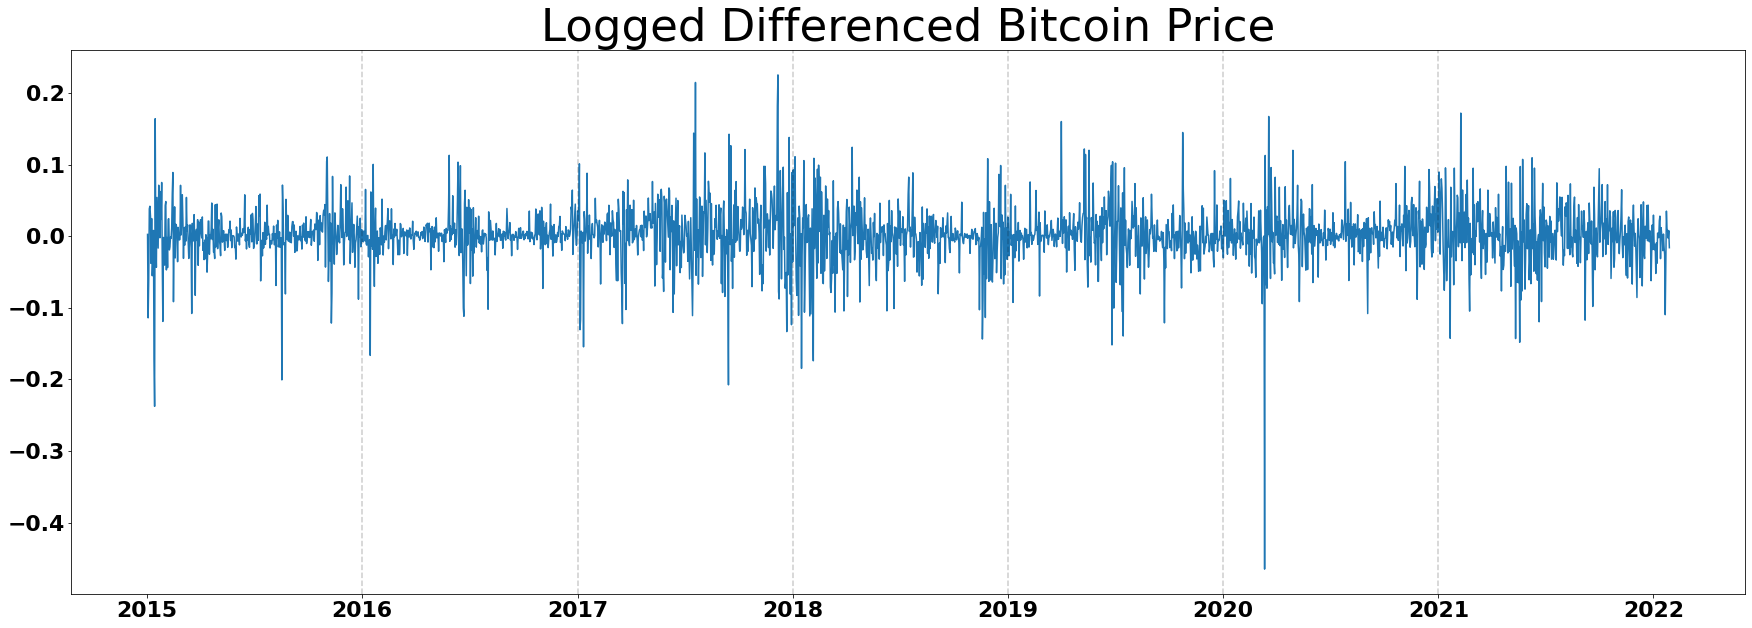

In [67]:
# Plotting the logged Differenced series
plt.plot(df3["log difference"].dropna(),label="Data")
plt.title("Logged Differenced Bitcoin Price", size=45)
for year in range(int(str(df.index[1])[:4])+1,2022):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"),color="k",linestyle="--",alpha=0.2)
plt.show()

In [68]:
# Testing for Stationarity test
adfuller_result(df3["log"].diff().dropna())

ADF Statistic: -15.266872491362864
P-Value: 4.775987450819509e-28
Critical Value:
	 1% : -3.432893058802077
	 5% : -2.862663524069147
	 10% : -2.5673680929672074
Reject Ho - Time Series is Stationary


## Square Root Transformation

In [69]:
# making a copy of the DataFrame
df4 = df.copy()

In [71]:
# taking a squareroot transformation
df4["sqrt"] = np.sqrt(df4.Close)

# taking a difference sqaureroot
df4["diff sqrt"] = df4["sqrt"].diff()
df4

,Close,sqrt,diff sqrt
Date,,,
2015-01-01,314.248993,17.727069,NaN
2015-01-02,315.032013,17.749141,0.022072
2015-01-03,281.082001,16.765500,-0.983641
2015-01-04,264.195007,16.254077,-0.511424
2015-01-05,274.473999,16.567257,0.313180
...,...,...,...
2022-01-24,36654.328130,191.453201,0.988494
2022-01-25,36954.003910,192.234242,0.781041
2022-01-26,36852.121090,191.969063,-0.265179


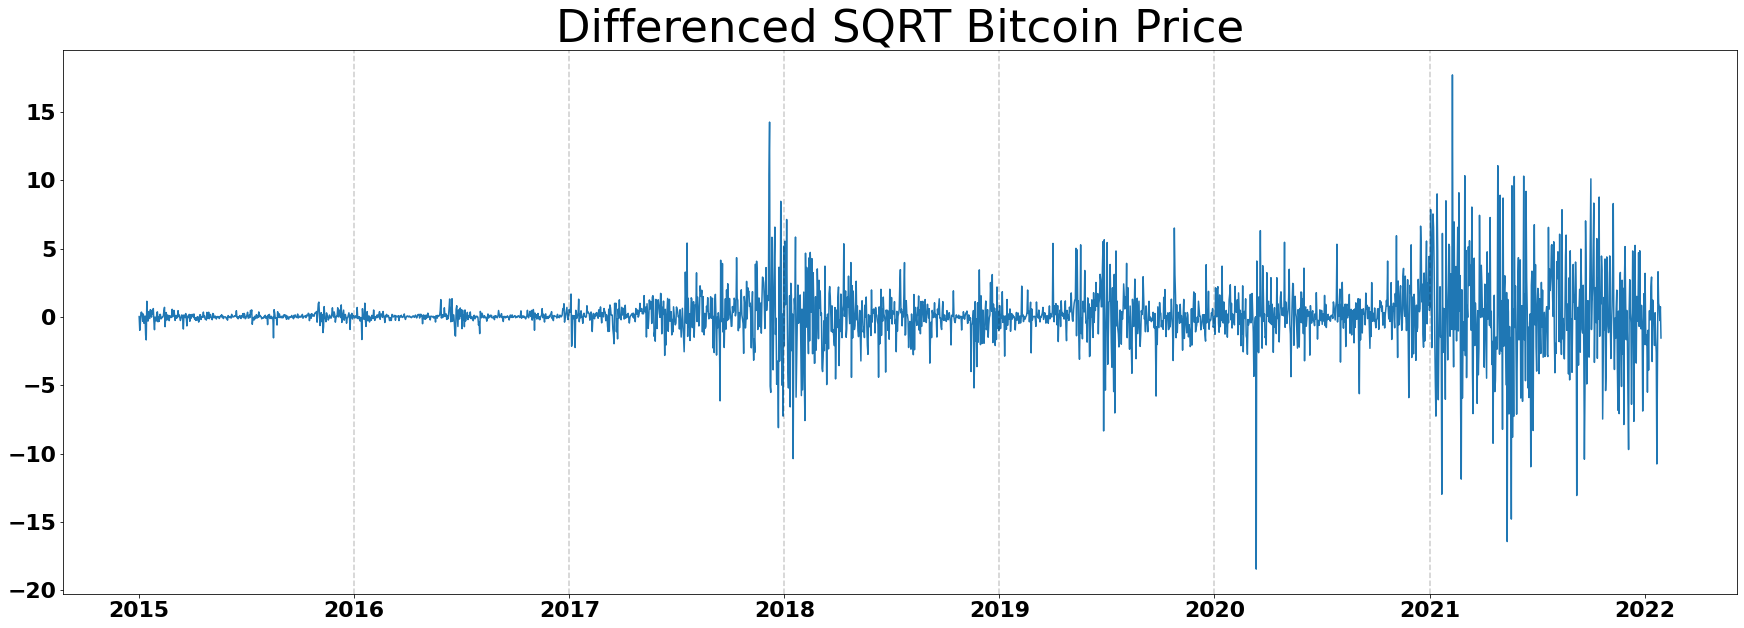

In [75]:
# Plotting the Differenced sqrt series
plt.plot(df4["diff sqrt"].dropna(),label="Data")
plt.title("Differenced SQRT Bitcoin Price", size=45)
for year in range(int(str(df.index[1])[:4])+1,2022):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"),color="k",linestyle="--",alpha=0.2)
plt.show()

In [78]:
adfuller_result(df4["diff sqrt"].dropna())

ADF Statistic: -8.509899932184442
P-Value: 1.1751587287977375e-13
Critical Value:
	 1% : -3.432911989053234
	 5% : -2.8626718838655236
	 10% : -2.5673725438015325
Reject Ho - Time Series is Stationary
